In [1]:
'''
Step 1: Load Data and Data Exploration

We'll be using the pre-labeled MNIST dataset, which contains 70,000 grayscale images of handwritten digits,
along with their corresponding digit labels.

Since we want our model to be able to perform well in the real world on previously unseen data,
we'll only train it on 60,000 images, and then evaluate our model on the remaining 10,000.

'''

"\nStep 1: Load Data and Data Exploration\n\nWe'll be using the pre-labeled MNIST dataset, which contains 70,000 grayscale images of handwritten digits,\nalong with their corresponding digit labels.\n\nSince we want our model to be able to perform well in the real world on previously unseen data,\nwe'll only train it on 60,000 images, and then evaluate our model on the remaining 10,000.\n\n"

In [2]:
import pandas as pd
import numpy as np
from tensorflow.keras.datasets import mnist

# Import MNIST Dataset from Keras

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 1s 0us/step


In [3]:
### Part A (10 PTS)

# How many training and testing examples are there. 
# Store the number of training examples in a variable called num_train. 
# Store the number of testing examples in a variable called num_test.

num_train = len(X_train)
num_test = len(X_test)

print("Number of training examples:", num_train)
print("Number of testing examples:", num_test)

Number of training examples: 60000
Number of testing examples: 10000


In [4]:
# What features are given for each example? (Answer: 28 x 28 pixel image)
print("Shape of one example: " + str(X_train[0].shape)) 

# What do our labels look like? (Answer: 0-9 digit corresponding to image)
print("Labels: ", y_train)

Shape of one example: (28, 28)
Labels:  [5 0 4 ... 5 6 8]


5


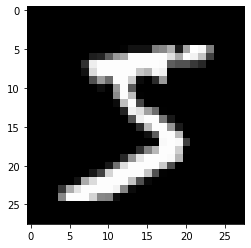

In [5]:
# Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Change this number and re-run the cell to see different image samples!
sample_num = 0

plt.imshow(X_train[sample_num], cmap=plt.get_cmap('gray'))
print(y_train[sample_num])
plt.show()

In [6]:
'''
Step 2: Data Preprocessing

Flatten the 28 x 28 2D images into 784-dimensional column vectors. Each pixel will then correspond to one neuron in
the 784-dimensional input layer of our neural network. Normalize the pixel values from 0-255 to 0-1. We can do this
by simply dividing each of the 0-255 greyscale values by 255. Neural networks typically like to work with smaller values,
so this normalization is a pretty common first step in most deep learning tasks. Categorize the outputs into
10-dimensional "one-hot" vectors. The MNIST dataset originally contains actual numerical labels for each image
(e.g. 1, 2, ...), but remember that our neural network outputs 10 distinct values (one for each digit) -- not just
the digit number itself. We want our training labels to match up with our neural network output. These categorized
vectors contain all 0's, except a 1 in the location indicating which digit the image corresponds to.
'''

'\nStep 2: Data Preprocessing\n\nFlatten the 28 x 28 2D images into 784-dimensional column vectors. Each pixel will then correspond to one neuron in\nthe 784-dimensional input layer of our neural network. Normalize the pixel values from 0-255 to 0-1. We can do this\nby simply dividing each of the 0-255 greyscale values by 255. Neural networks typically like to work with smaller values,\nso this normalization is a pretty common first step in most deep learning tasks. Categorize the outputs into\n10-dimensional "one-hot" vectors. The MNIST dataset originally contains actual numerical labels for each image\n(e.g. 1, 2, ...), but remember that our neural network outputs 10 distinct values (one for each digit) -- not just\nthe digit number itself. We want our training labels to match up with our neural network output. These categorized\nvectors contain all 0\'s, except a 1 in the location indicating which digit the image corresponds to.\n'

In [7]:
###  Part B (10 pts)

# Find the number of total pixels in each image.
# Store the result in a variable called 'num_pixels'.

num_pixels = X_train.shape[1] * X_train.shape[2] # 28 * 28 = 784

In [8]:
### Part C (15 pts)


# We need to flatten 28*28 images to a 784 vector for each image
# Store the flattened train set into a variable called 'X_train_flattened'.
# Store the flattened test set into a variable called 'X_test_flattened'.

X_train_flattened = X_train.reshape(X_train.shape[0], num_pixels).astype('float32') # new shape: 60,000 x 784
X_test_flattened = X_test.reshape(X_test.shape[0], num_pixels).astype('float32') # new shape: 10,000 x 784

In [9]:
### Part D (10 pts)

# Normalize pixel values to between 0-1.
# Keep the data stored in X_train_flattened and X_tst flattened.

X_train_flattened = X_train_flattened / 255.
X_test_flattened = X_test_flattened / 255

In [10]:
# Categorize the outputs ("one-hot" vectors)
import tensorflow as tf

y_train_categorical = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test_categorical = tf.keras.utils.to_categorical(y_test, num_classes=10)

# What does the first label look like after one-hot encoding?
print(y_train[0], y_train_categorical[0])

5 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [11]:
'''
Step 3: Create Neural Network Model

Initialize the network, add desired layers. The settings we decide to use, e.g. number of layers, number of
neurons per layer, are called hyperparameters, and have to be tuned by hand, rather than learned via gradient descent.
Compile the network to get ready for training. This tells the network what cost/loss function to use
("cost" and "loss" are used interchangeably), and what type of gradient descent to use. Training the network,
using the training images. This actually feeds the training data into the network, and uses gradient descent
and backpropagation to adjust the network's weights in order to minimize the cost function.
'''

'\nStep 3: Create Neural Network Model\n\nInitialize the network, add desired layers. The settings we decide to use, e.g. number of layers, number of\nneurons per layer, are called hyperparameters, and have to be tuned by hand, rather than learned via gradient descent.\nCompile the network to get ready for training. This tells the network what cost/loss function to use\n("cost" and "loss" are used interchangeably), and what type of gradient descent to use. Training the network,\nusing the training images. This actually feeds the training data into the network, and uses gradient descent\nand backpropagation to adjust the network\'s weights in order to minimize the cost function.\n'

In [12]:
### Part E (25 pts)

# 1 -- Network Initialization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Initialize a simple sequential neural network model
model = Sequential()

### Add the following layers to 'model'.
# Hidden layer 1: 64 neurons (somewhat arbitrary), 'relu' activation 
# Hidden layer 2: 32 neurons (somewhat arbitrary), 'relu' activation
# Output layer: 10 neurons (one for each class), 'softmax' activation

model.add(Dense(units=64, input_dim=784, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

# Print a summary of what you just created
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [13]:
# 2 -- Network Compilation

# Compile. Loss function: categorical crossentropy. Optimizer: stochastic gradient descent (SGD). Metrics: 'accuracy'
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [14]:
# 3 -- Network Training

# Number of epochs: 10 (i.e. how many times to loop over the training data)
# Batch size: 16 (how big our "random walk" samples should be)

model.fit(X_train_flattened, y_train_categorical, epochs=1, batch_size=16)

3750/3750 [==============================] - 5s 1ms/step - loss: 0.5135 - accuracy: 0.8561


In [15]:
'''
Step 4: Evaluation & Predictions
'''

'\nStep 4: Evaluation & Predictions\n'

In [16]:
### Save the final cost of the loss model in a varaible called 'final_cost'.
### Save the final cost of the model on the test set in a variable called 'test_accuracy'.

loss_and_metrics = model.evaluate(X_test_flattened, y_test_categorical, batch_size=128, verbose=0)

final_cost = loss_and_metrics[0]
test_accuracy = loss_and_metrics[1]

print("Final test cost: ", final_cost)
print("Final test accuracy: ", test_accuracy)

Final test cost:  0.2675219774246216
Final test accuracy:  0.9251000285148621


In [17]:
'''
Final Sanity Check: Make sure the our neural network's predictions match up with the actual images
'''

"\nFinal Sanity Check: Make sure the our neural network's predictions match up with the actual images\n"

Output vector:  [1.7034657e-04 4.1558546e-06 4.3948758e-03 1.9132051e-03 1.2677796e-06
 2.3235347e-04 1.5021093e-06 9.9252045e-01 8.6761494e-05 6.7506958e-04]
Predicted digit:  7


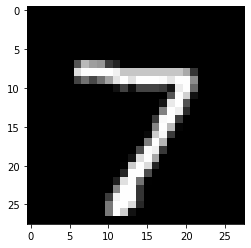

In [18]:
# Pick a random test sample and see what the model predicts! 
sample_num = 0 

import numpy as np

test_sample = np.expand_dims(X_test_flattened[sample_num], axis=0) # pick out a one-sample "batch" to feed into model
predicted_scores = model.predict(test_sample) # outputted probabilities vector
print("Output vector: ", predicted_scores[0]) # print predicted scores

predicted_class = np.argmax(predicted_scores) # pick the class with highest probability --> final prediction
print("Predicted digit: ", predicted_class) # print predicted classification

# Show actual input image
plt.imshow(X_test[sample_num], cmap=plt.get_cmap('gray'))
plt.show()